# Overview
This jupyter notebook demonstrates binary classification with logistic regression. The iris data set have 3 classes for their targets. The classes are 'setosa', 'versicolor' and 'versinica'. In this jupyter notebook, I am trying to classify 'setosa' and 'versinica'.

# References
* https://en.wikipedia.org/wiki/Iris_flower_data_set
* https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

# Libraries

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_validate


sns.set(style='darkgrid')
%config InlineBackend.figure_formats = {'png', 'retina'}

# Load data

In [19]:
iris = load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

# Visualization

In [21]:
setosa_sepal_length = X[:50, 0]
setosa_sepal_width = X[:50, 1]
versicolor_sepal_length = X[50:100, 0]
versicolor_sepal_width = X[50:100, 1]
versinica_sepal_length = X[100:, 0]
versinica_sepal_width = X[100:, 1]

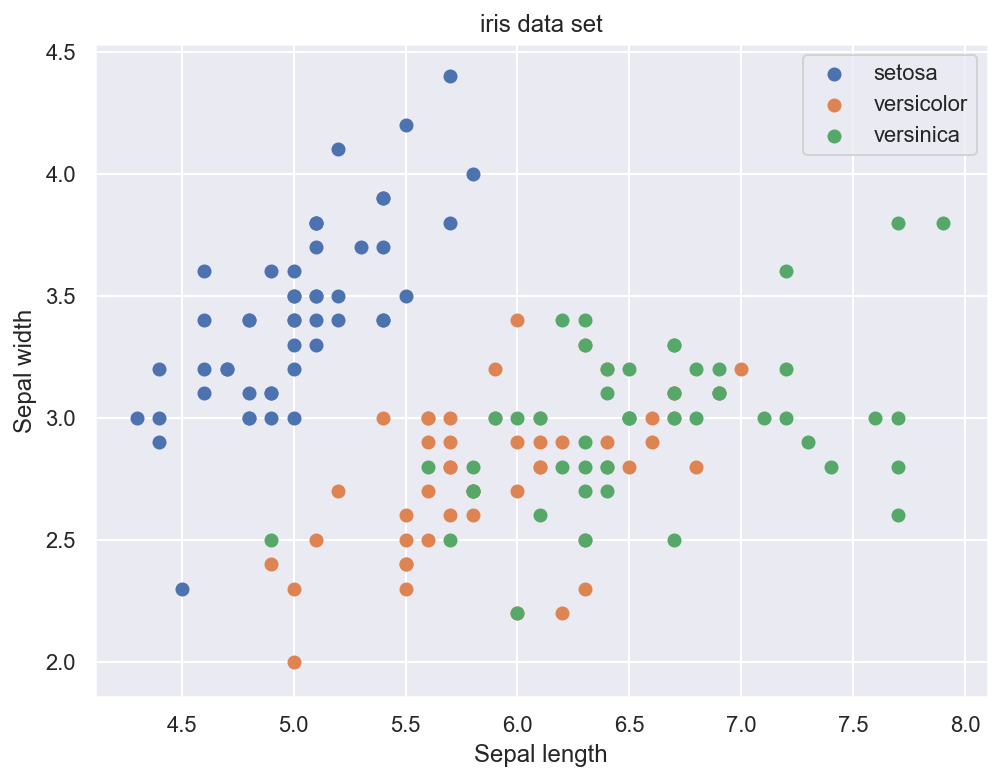

In [26]:
fig = plt.figure(figsize=(8, 6))
plt.scatter(setosa_sepal_length, setosa_sepal_width, label='setosa')
plt.scatter(versicolor_sepal_length, versicolor_sepal_width, label='versicolor')
plt.scatter(versinica_sepal_length, versinica_sepal_width, label='versinica')
plt.title('iris data set')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend()
plt.show()

# Learning

In [64]:
# extract 'setosa' and 'versinica' data
features = np.vstack((X[:50, [0, 1]], X[100:, [0, 1]]))
labels = np.hstack((y[:50], y[100:])) // 2  # versinica label: 2 -> 1

In [73]:
clf = LogisticRegression
scores = cross_validate(clf, features, labels, cv=5)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [74]:
for key in scores.keys():
    print('{}: {:.5f}'.format(key, scores[key].mean()))

fit_time: 0.00279
score_time: 0.00093
test_score: 0.99000
train_score: 0.99000


/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
